# Project Code

### NOTE: This file contains detail 'Data Analysis' , Machine learning models for classification, Deep Learning models(ANN,CNN,RNN,LSTM,GRU) whereas results came on 50 epochs for all neural network. Lastly ensemble boosting(Hard Vote Classifier) on deep learning models.

![](Architecture.jpeg)

In [1]:
#ALL LIBRARIES

# Import sklearn Libraries

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Import Tensorflow & Keras Libraries

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN
from keras.layers import LSTM, Dense, Embedding, Dropout, Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, \
    Flatten, GRU
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential

# Visulization Libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot

# Other Libraries

import collections
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd


### Data load

In [2]:
#Test.csv - A very small subset of data(around 100 observation). It will take 4/5 minutes to run.
#creditcard.csv - Original dataset. It will take around 8 hours to run whole code.
#df=pd.read_csv('Test.csv')
df=pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

- Original features V1, V2,... V28 have been converted using PCA due to a confidentiality issue; nonetheless, my guess is that these features include credit card number, expiration date, CVV, cardholder name, transaction location, transaction date-time, and so on. 
- Only features which have not been transformed with PCA are 'Time',  'Amount' and 'Class'.
 - 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
 - The transaction Amount is represented by the feature 'Amount,' which can be utilised for example-dependent cost-sensitive      learning.
 - The response or target variable is the Feature 'Class,' which takes the value 1 in the case of fraud and 0 otherwise.

# Data Prepocessing

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Because the majority of the columns V1, V2,... V28 are modified using PCA, neither the features nor the descriptive statistics will make much sense, so we'll ignore them and only consider Time and Amount, which makes sense.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df[df.duplicated()].shape

(1081, 31)

It looks like there are 1081 duplicate data, we should drop them.

In [7]:
df.drop_duplicates()

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[283726 rows x 31 columns]

After dropping the duplicate rows the dataset have 283726 rows and 31 columns.


# Initial Analysis

## Univariate Analysis

The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Target variable/Class analysis 

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df[df.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

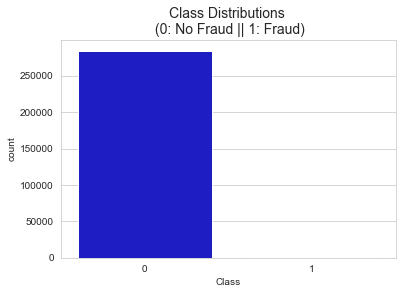

In [11]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Outlier Detection

An outlier is a value in a random sampling from a population that deviates abnormally from other values.
we are using Box Plot to detect the outliers of 'Amount' features in our dataset, where any point above or below the whiskers represent an outlier. As Amount is the only numeric feature which has meaning.

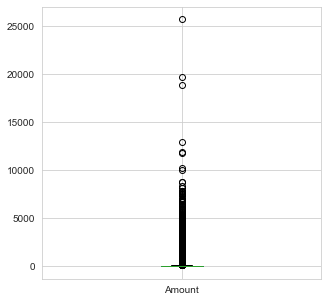

In [12]:
plt.figure(figsize=[5,5])
df.boxplot(column= [ 'Amount'])
plt.show()

-We will apply Median Imputation to deal with outliers after we've detected them. The extreme numbers are replaced by median values in this strategy. IQR = Q3-Q1 is the formula to calculate it. For each of the variables in the dataset feature "Amount", the lines of code below calculate and report the interquartile range.

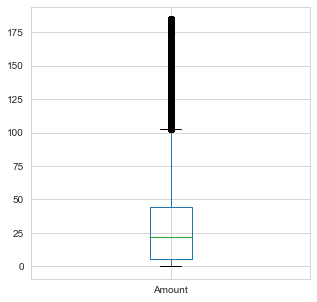

In [13]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['Amount'])
for j in df['Amount']:
    if j > Upper_tail or j < Lower_tail:
        df['Amount'] = df['Amount'].replace(j, med)
plt.figure(figsize=[5,5])
df.boxplot(column= ['Amount'])
plt.show()

### Column 'Time' and 'Amount' Distribution

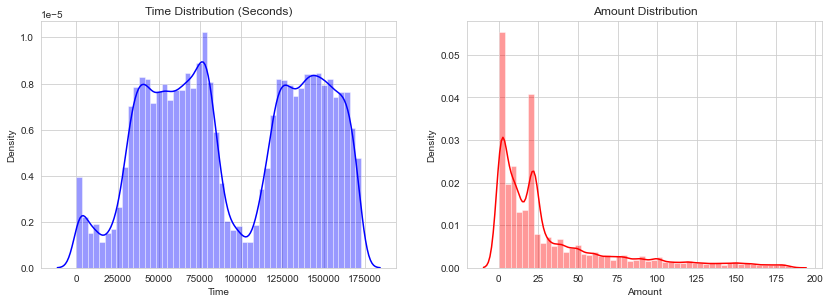

In [14]:
plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue');
plt.subplot(2, 2, 2)
plt.title('Amount Distribution')
sns.distplot(df['Amount'],color='red');

## Bivariate Analysis

### correlation investication among features

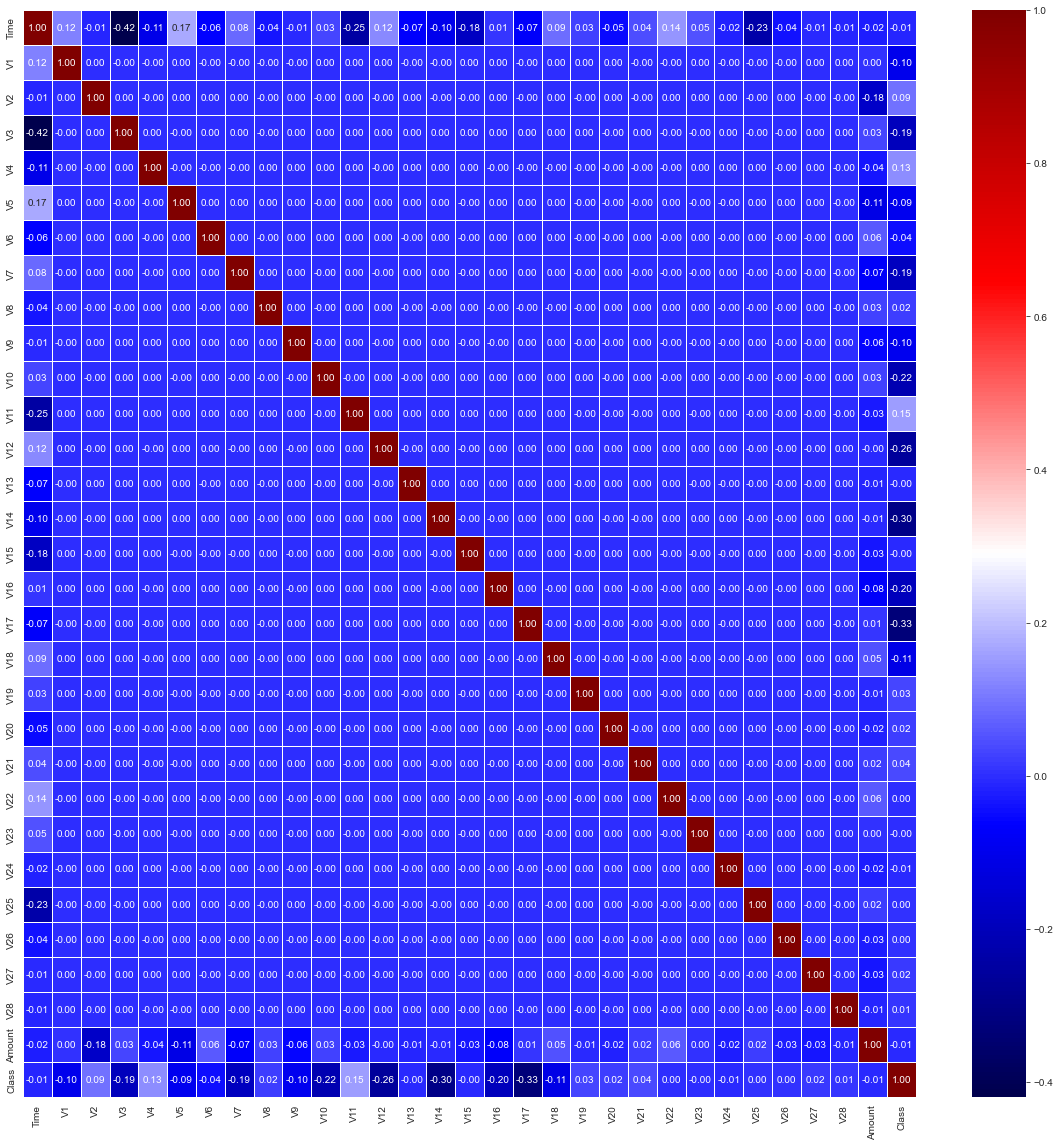

In [15]:
# heatmap to find any high correlations
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), cmap="seismic",linewidths=1,linecolor='white',annot=True,fmt=".2f")
plt.show();

In [ ]:
"""
Highest correlations come from:
- Negative: Time & V3 (-0.42)
- Positive: Time & V5 (0.17)

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.
"""

#### Distribution Plot with Class variable: 

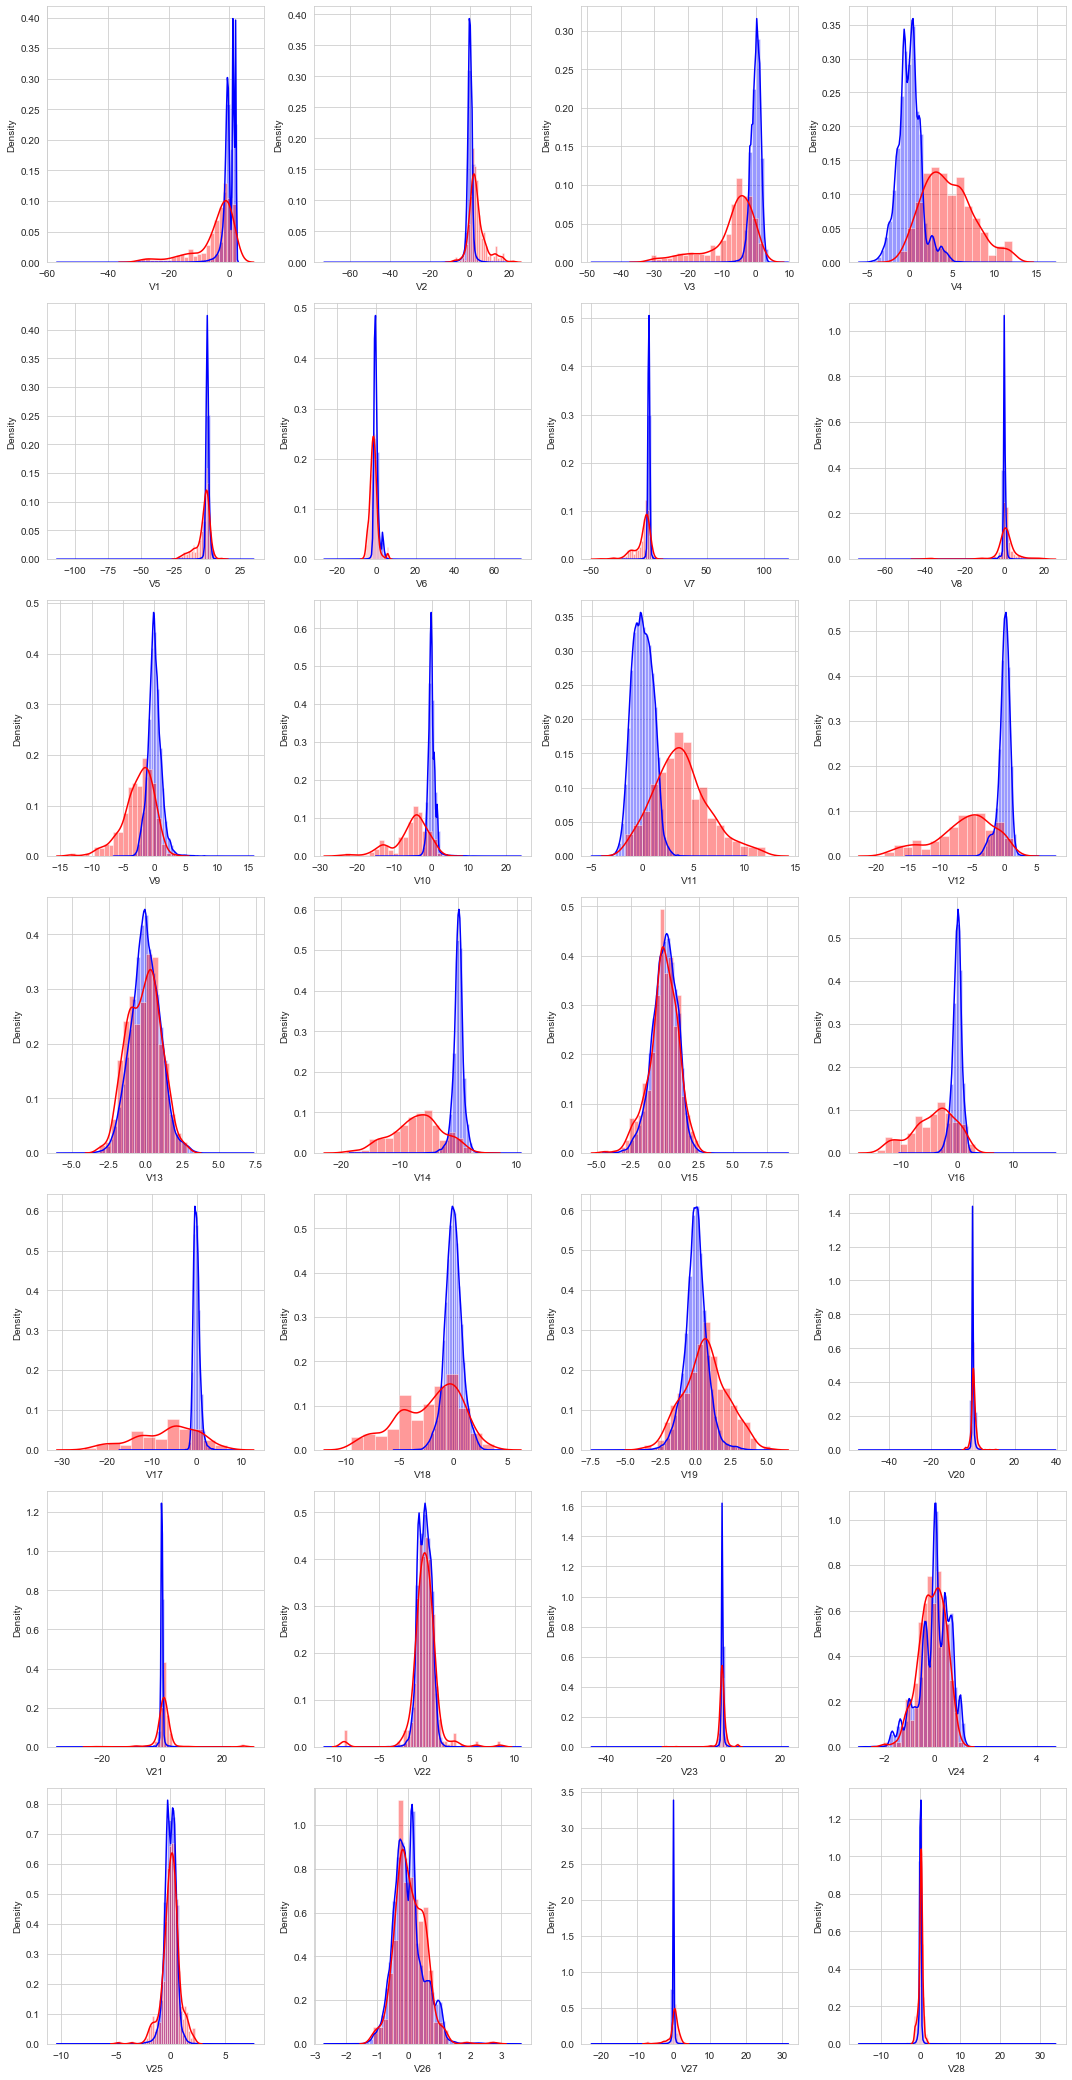

In [16]:
V = df[[col for col in df.columns if 'V' in col]+['Class']]
f, ax = plt.subplots(ncols = 4, nrows = 7, figsize=(15,1*len(V.columns)))
for i, c in zip(ax.flatten(), V.columns):
    sns.distplot(V[c][V['Class'] == 0],color='blue', ax = i) #Genuine
    sns.distplot(V[c][V['Class'] == 1],color='red', ax = i) #Fraud   
f.tight_layout()

### Amount distribution based on Class

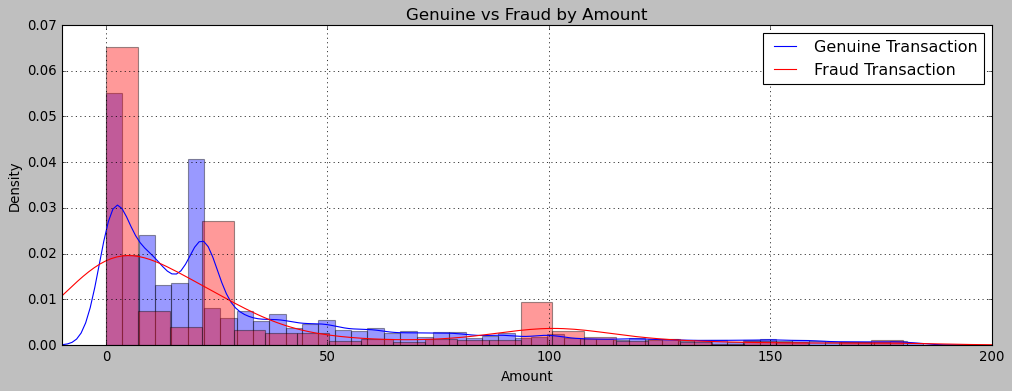

In [17]:
plt.style.use("classic")
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Amount"], color='blue') # Genuine - blue
sns.distplot(df[df['Class'] == 1]["Amount"], color='red') # Fraud - Red
plt.title('Genuine vs Fraud by Amount', fontsize=15)
plt.xlim([-10,200])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine Transaction','Fraud Transaction'])
plt.show()

We can notice that transaction under 500$ have the most density. lower amount have high density in fraud transaction. It is for being unnoticable.

### Two Class(Genuine and Fraud) with Time

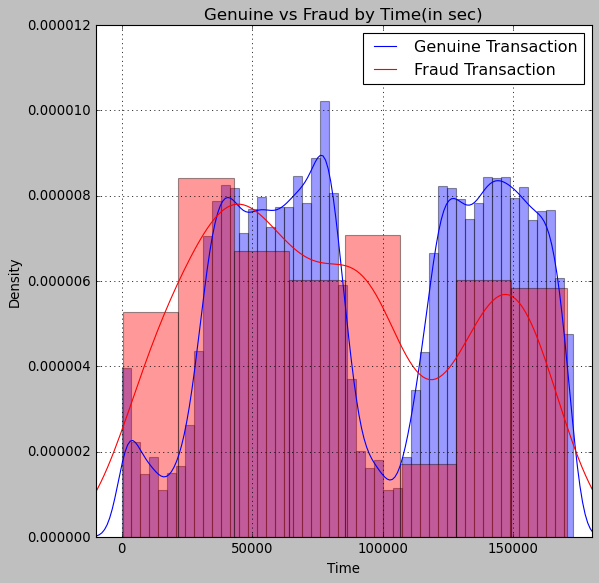

In [18]:
plt.style.use("classic")
plt.figure(figsize=(8,8))
sns.distplot(df[df['Class'] == 0]["Time"], color='blue') # Genuine - blue
sns.distplot(df[df['Class'] == 1]["Time"], color='red') # Fraud - Red
plt.title('Genuine vs Fraud by Time(in sec)', fontsize=15)
plt.xlim([-10000,180000])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine Transaction','Fraud Transaction'])
plt.show()

## Multivariate Analysis

### Time and Amound plot based on Classes.

<AxesSubplot:xlabel='Time', ylabel='Amount'>

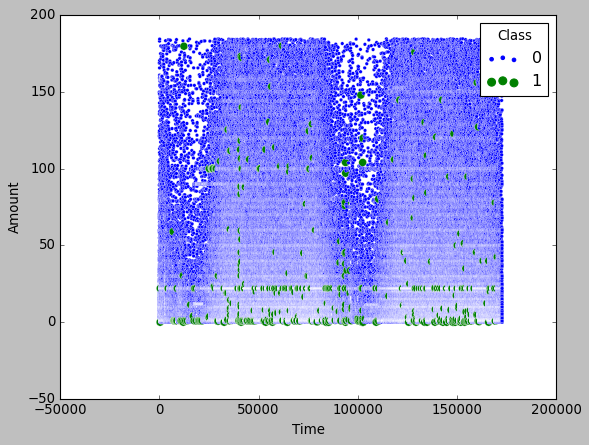

In [19]:
sns.scatterplot(data=df, x="Time", y="Amount", hue="Class",size="Class", sizes=(50, 10))
# as the dataset is imbalance so minor classes points is plotted 5 times bigger than majority class 

# Feature Scaling

As V1 to V28 features are already PCA transformed and 'Class' is classifier so the feature "Time" and "Amount" would need for scalling for better prediction in deep learning model.

We will use 'StandardScaler' for scalling two features. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.Divide all of the values by the standard deviation to get unit variance. The StandardScaler function produces a distribution with a standard deviation of one.

In [20]:
sc = StandardScaler()
df[['Time', 'Amount']] = sc.fit_transform(df[['Time', 'Amount']])

In [21]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  2.906089      0  
1  0.167170  0.125895 -0.008983  0.014724 -0.771749      0  
2 -0.327642 -0.139097 -0.055353 -0.059752 -0.288396      0  
3  0.647376 -0.221929  0.062723  0.061458  2.252273      0  
4 -0.206010  0.502292  0.219422  0.215153  0.912852      0  

[5 rows x 31 columns]

# Handling Imbalance Data

As the dataset is highly imbalanced. So due to balancing the dataset we could do undersampling of majority class or oversampling the minority class. For our project, we will oversampling minority class due to balance the dataset. So, we will preserve all necessary values inside dataset.Ther are several oversampling technique available, we will use SMOTE for oversampling minority class. 

SMOTE stands for Synthetic Minority Oversampling Technique. It creates new synthetic samples to balance the dataset.SMOTE generates synthetic data using the k-nearest neighbour technique. Smote is used to construct step samples:

- Determine the feature vector's closest neighbour. 
- Calculate the distance between the two sample points.
- Multiply the distance with a random number between 0 and 1.
- At the computed distance, find a new point on the line segment.
- Repeat the process for identified feature vectors.

In [22]:
Data=df.drop('Class',axis=1)
Target=df['Class']
print('shape of Data',Data.shape)
print('shape of Target',Target.shape)

shape of Data (284807, 30)
shape of Target (284807,)


In [23]:
oversample = SMOTE(random_state=2)
Data_new,Target_new=oversample.fit_resample(Data,Target)
print('shape of Data after oversampling',Data_new.shape)
print('shape of Target after oversampling',Target_new.shape)

shape of Data after oversampling (568630, 30)
shape of Target after oversampling (568630,)


### Class Distribution of Balanced Data

In [24]:
print('Before Oversampling: {}'.format(Counter(Target)))
print('After Oversampling: {}'.format(Counter(Target_new)))

Before Oversampling: Counter({0: 284315, 1: 492})
After Oversampling: Counter({0: 284315, 1: 284315})


<AxesSubplot:>

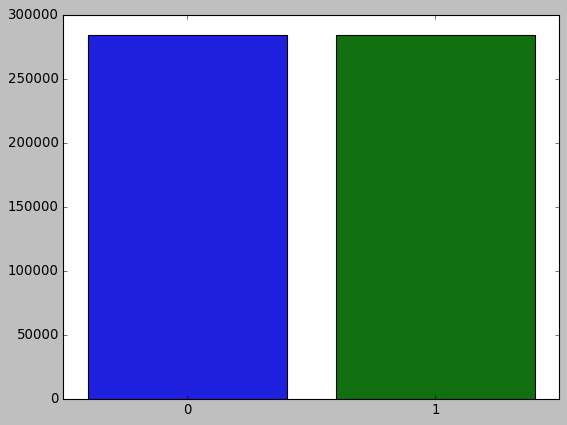

In [25]:
d = collections.Counter(Target_new)
sns.barplot(list(d.keys()), list(d.values()))

## Split Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_new, Target_new, test_size=0.3, random_state=42)

# Machine Learning Models

The Following Machine Learning algorithms has been used for initial prediction.
-Logistic Regression
-Support Vector Classifier(SVM)
-Dession Tree Classifier
-Random Forest Classifier
-Kneibour Classifier(KNN)

Function 'model_evaluate' - It will take model as parameter and print results and return confusion matrix.
At last part it will print confusion matrix heatmap for all ML models

Record result- 'Accuracy_all_MODEL'is a list that will keep the record for all accuracy score.

In [27]:
Accuracy_all_MODEL=[]

In [28]:
Accuracy_all_MODEL=[]
def model_evaluate(model):
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    train_score=model.score(X_train,y_train)
    y_prediction=model.predict(X_test)
    com_decision = confusion_matrix(y_test,y_prediction)
    
    Accuracy_model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
    Error_rate_model = ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
    Specificity_model = (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
    Sensitivity_model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
    
    class_report=classification_report(y_test,y_prediction)
    
    print("========================================")
    print("Model Name",model)
    print("========================================")
    print("Training Score:",train_score)
    print("")
    print("Confusion Matrix")
    print(com_decision)
    
    print('Accuracy Decision : ',Accuracy_model)
    print('Error Rate Decision : ',Error_rate_model)
    print('Specificity Decision : ',Specificity_model)
    print('Sensitivity Decision : ',Sensitivity_model)
    print("----------------------------------------")
    print("CLASSIFICATION REPORT")
    print("----------------------------------------")
    print(print(class_report))
    print("----------------------------------------")
    print("MODEL ACCURACY SCORE : ",acc)
    print("========================================")
    print("\n")
    Accuracy_all_MODEL.append(acc)
    return com_decision

In [29]:
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)
models=[lr,svm,dt,rf,knn]
for model in models:
    model_evaluate(model)

Model Name LogisticRegression()
Training Score: 0.9474601862622192

Confusion Matrix
[[82983  2166]
 [ 6897 78543]]
Accuracy Decision :  94.68723071241405
Error Rate Decision :  5.312769287585952
Specificity Decision :  97.31628442924581
Sensitivity Decision :  92.326435246996
----------------------------------------
CLASSIFICATION REPORT
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

None
----------------------------------------
MODEL ACCURACY SCORE :  0.9468723071241405


Model Name SVC()
Training Score: 0.9799342278810474

Confusion Matrix
[[83858  1291]
 [ 2084 83356]]
Accuracy Decision :  98.02156059300424
Error Rate Decision :  1.9784394069957616
Specificity Decisi

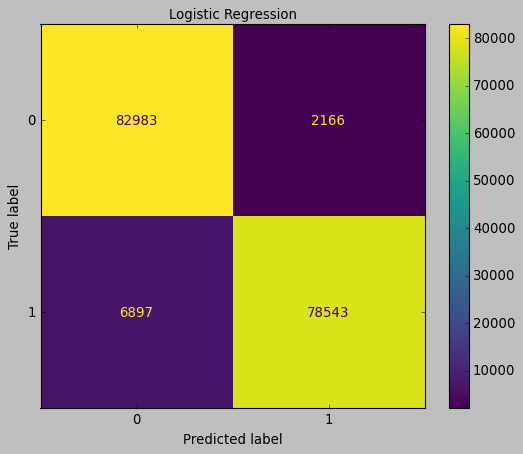

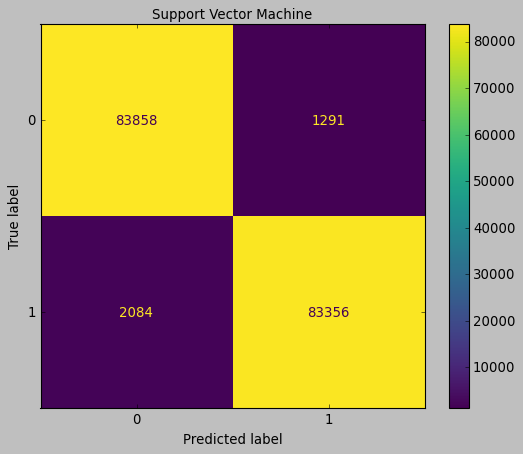

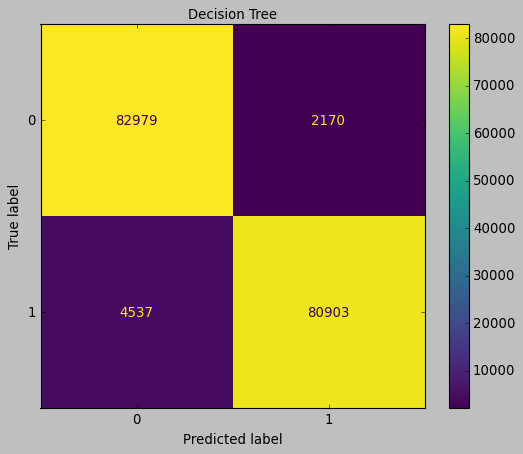

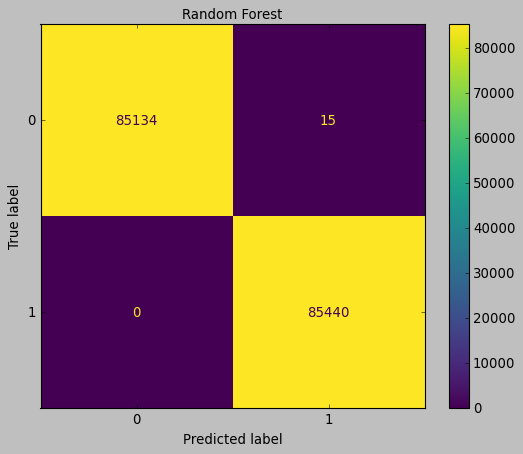

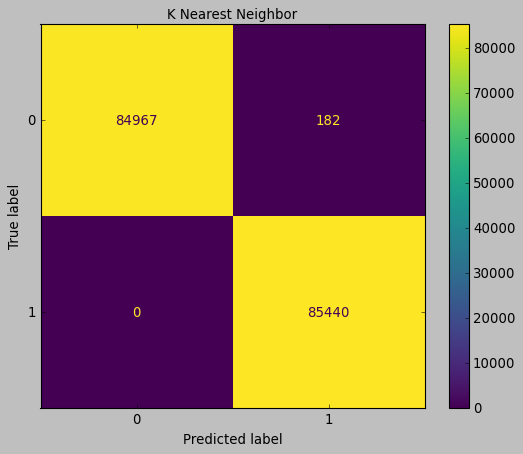

In [68]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Logistic Regression', fontsize=12)
plt.show()
plot_confusion_matrix(svm, X_test, y_test)  
plt.title('Support Vector Machine', fontsize=12)
plt.show()
plot_confusion_matrix(dt, X_test, y_test)
plt.title('Decision Tree', fontsize=12)
plt.show()
plot_confusion_matrix(rf, X_test, y_test)
plt.title('Random Forest', fontsize=12)
plt.show()
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('K Nearest Neighbor', fontsize=12)
plt.show()

In [31]:
"""
# save the model to disk
# lr,svm,dt,rf,knn
import joblib
Project = 'LR_model.sav'
joblib.dump(lr, Project)

Project = 'SVM_model.sav'
joblib.dump(svm, Project)

Project = 'DT_model.sav'
joblib.dump(dt, Project)

Project = 'RF_model.sav'
joblib.dump(rf, Project)

Project = 'KNN_model.sav'
joblib.dump(knn, Project)
"""

"\n# save the model to disk\n# lr,svm,dt,rf,knn\nimport joblib\nProject = 'LR_model.sav'\njoblib.dump(lr, Project)\n\nProject = 'SVM_model.sav'\njoblib.dump(svm, Project)\n\nProject = 'DT_model.sav'\njoblib.dump(dt, Project)\n\nProject = 'RF_model.sav'\njoblib.dump(rf, Project)\n\nProject = 'KNN_model.sav'\njoblib.dump(knn, Project)\n"

# Deep Learning Models

In [ ]:
"""
METHODOLOGY:
    -The code will run for Artificial Neural Network(ANN),Convolutional Neural Network(CNN) and Reccurent Neural Network(RNN) 
    Individually.
    -For ANN input shape is two dimensional, for CNN and RNN, input shape is three dimensional.
"""

In [ ]:
"""
Function confusion_metrix_calculation
      - It will take neural network prediction and y_test as parameter.
      - Convert both paramet to list calculate confusion matrix.
      - make heat map from confusion matrix
"""

In [32]:
def confusion_metrix_calculation(ypred,ytest):
    y_target = list(ytest)
    y_prediction = list(ypred)
    from sklearn.metrics import confusion_matrix
    com_decision=confusion_matrix(y_target, y_prediction)
    Accuracy_model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
    Error_rate_model = ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
    Specificity_model = (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
    Sensitivity_model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
    print("Confusion Matrix")
    print(com_decision)
    print('Error Rate     : ',Error_rate_model)
    print('Specificity    : ',Specificity_model)
    print('Sensitivity    : ',Sensitivity_model)
    print('MODEL ACCURACY : ',Accuracy_model)
    sns.heatmap(com_decision, annot=True, cmap=plt.cm.copper)
    #con_plt.show()

# ANN

In [33]:
X_train_ann1 = X_train
X_test_ann1 = X_test
y_train_ann = y_train
y_test_ann = y_test

sc = StandardScaler()
X_train_ann = sc.fit_transform(X_train_ann1)
X_test_ann = sc.transform(X_test_ann1)

model_ANN = Sequential()
model_ANN.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))
model_ANN.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))
model_ANN.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))
model_ANN.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))
model_ANN.summary()
model_ANN.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
history_ANN=model_ANN.fit(X_train_ann, y_train_ann,validation_data=(X_test_ann, y_test_ann), batch_size = 100, epochs =50)
#history_ANN=model_ANN.fit(X_train_ann, y_train_ann,validation_data=(X_test_ann, y_test_ann), batch_size = 100, epochs =100)
#history_ANN=model_ANN.fit(X_train_ann, y_train_ann,validation_data=(X_test_ann, y_test_ann), batch_size = 100, epochs =150)
#history_ANN=model_ANN.fit(X_train_ann, y_train_ann,validation_data=(X_test_ann, y_test_ann), batch_size = 100, epochs =200)
#model_ANN.save('model_ANN.hdf5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 186       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3981/3981 [==============================] - 3s 852us/step - loss: 0.1976 - accuracy: 0.9518 - val_loss: 0.1076 - val_accuracy: 0.9702
Epoch 2/50
3981/3981 [==============================] - 3s 816us/step - loss: 0.0768 - accuracy: 0.9767 - val_

In [34]:
# evaluate the model
_, train_acc = model_ANN.evaluate(X_train_ann, y_train_ann, verbose=0)
_, test_acc = model_ANN.evaluate(X_test_ann, y_test_ann, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.988, Test: 0.987


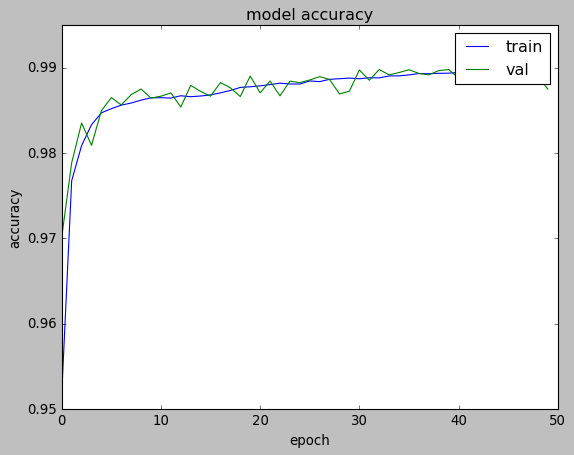

In [35]:
pyplot.plot(history_ANN.history['accuracy'])
pyplot.plot(history_ANN.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

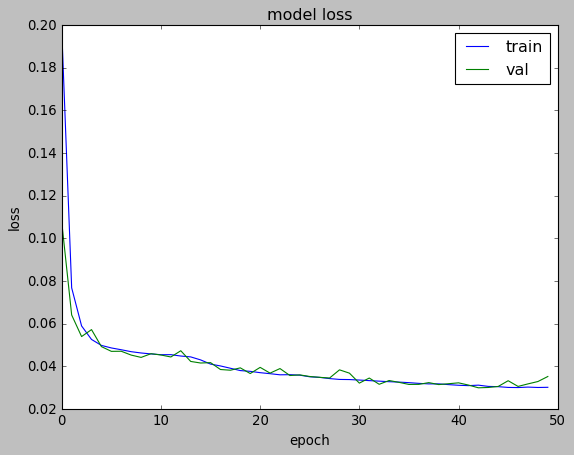

In [36]:
pyplot.plot(history_ANN.history['loss'])
pyplot.plot(history_ANN.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[83223  1926]
 [  209 85231]]
Error Rate     :  1.2515461137588004
Specificity    :  97.79019470610507
Sensitivity    :  99.7494965960303
MODEL ACCURACY :  98.7484538862412


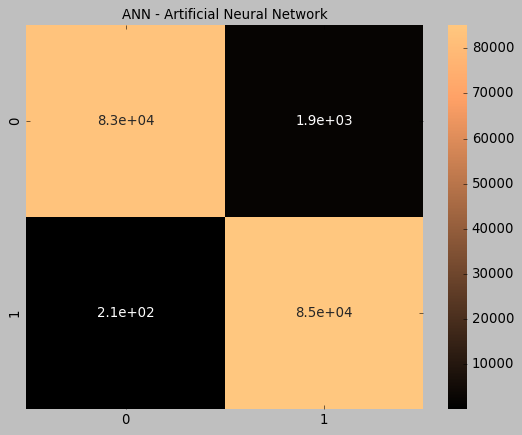

In [37]:
ypred_ann=model_ANN.predict_classes(X_test_ann)
confusion_metrix_calculation(ypred_ann,y_test)
plt.title('ANN - Artificial Neural Network', fontsize=12)
plt.show()

# CNN

In [38]:
X_train_cnn1 = X_train
X_test_cnn1 = X_test
y_train_cnn = y_train
y_test_cnn = y_test

sc = StandardScaler()
X_train_cnn = sc.fit_transform(X_train_cnn1)
X_test_cnn = sc.transform(X_test_cnn1)
X_train_cnn=X_train_cnn.reshape(X_train_cnn.shape[0],X_train_cnn.shape[1],1)
X_test_cnn=X_test_cnn.reshape(X_test_cnn.shape[0],X_test_cnn.shape[1],1)
epochs=50
model_CNN=Sequential()
model_CNN.add(Conv1D(32,2,activation='relu',input_shape=X_train_cnn[0].shape))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPool1D(2))
model_CNN.add(Dropout(0.2))
model_CNN.add(Conv1D(64,2,activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPool1D(2))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(64,activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1,activation='sigmoid'))
model_CNN.summary()
model_CNN.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history_CNN = model_CNN.fit(X_train_cnn,y_train_cnn,epochs=50,validation_data=(X_test_cnn,y_test_cnn))
#history_CNN = model_CNN.fit(X_train_cnn,y_train_cnn,epochs=100,validation_data=(X_test_cnn,y_test_cnn))
#history_CNN = model_CNN.fit(X_train_cnn,y_train_cnn,epochs=150,validation_data=(X_test_cnn,y_test_cnn))
#history_CNN = model_CNN.fit(X_train_cnn,y_train_cnn,epochs=200,validation_data=(X_test_cnn,y_test_cnn))
#model_CNN.save('model_CNN.hdf5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)            

In [39]:
# evaluate the model
_, train_acc2 = model_CNN.evaluate(X_train_cnn, y_train_cnn, verbose=0)
_, test_acc2 = model_CNN.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc2, test_acc2))

Train: 0.996, Test: 0.996


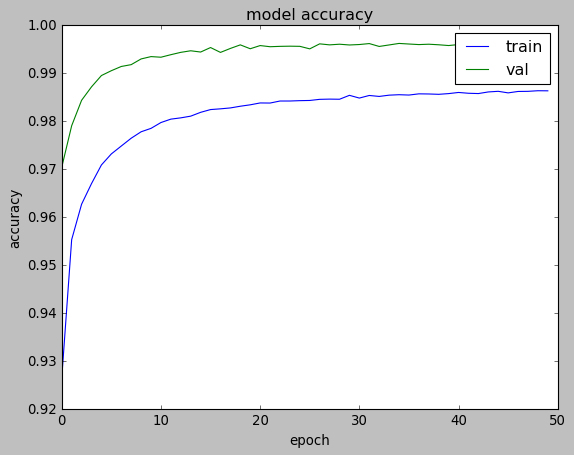

In [40]:
pyplot.plot(history_CNN.history['accuracy'])
pyplot.plot(history_CNN.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

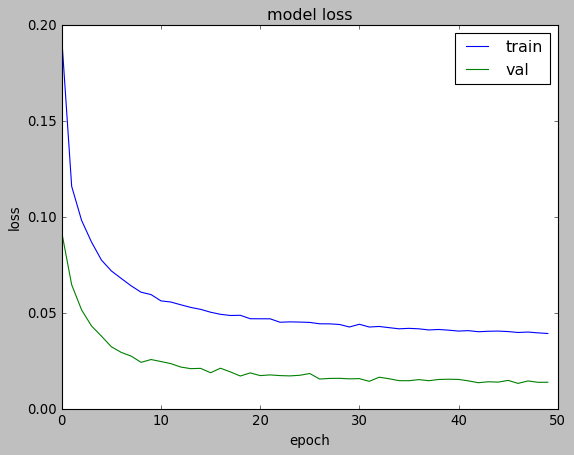

In [41]:
pyplot.plot(history_CNN.history['loss'])
pyplot.plot(history_CNN.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

Confusion Matrix
[[84521   628]
 [    0 85440]]
Error Rate     :  0.36813628076839655
Specificity    :  99.27034437886323
Sensitivity    :  100.0
MODEL ACCURACY :  99.6318637192316


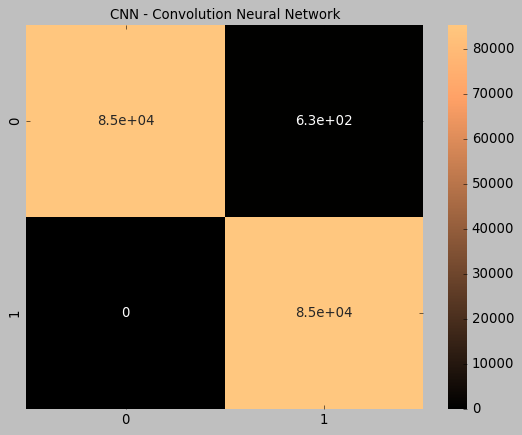

In [42]:
ypred_cnn=model_CNN.predict_classes(X_test_cnn)
confusion_metrix_calculation(ypred_cnn,y_test)
plt.title('CNN - Convolution Neural Network', fontsize=12)
plt.show()

# RNN

In [43]:
X_train_rnn1 = X_train
X_test_rnn1 = X_test
y_train_rnn = y_train
y_test_rnn = y_test

rc = StandardScaler()
X_train_rnn = rc.fit_transform(X_train_rnn1)
X_test_rnn = rc.transform(X_test_rnn1)

X_train_rnn=X_train_rnn.reshape(X_train_rnn.shape[0],X_train_rnn.shape[1],1)
X_test_rnn=X_test_rnn.reshape(X_test_rnn.shape[0],X_test_rnn.shape[1],1)
#Building RNN model for the dataset
model_RNN= Sequential()
model_RNN.add(SimpleRNN(32,input_shape=X_train_rnn[0].shape, activation="relu"))
model_RNN.add(Dense(8,activation="relu"))
model_RNN.add(Dense(1))
model_RNN.compile(loss="binary_crossentropy", optimizer="rmsprop")
model_RNN.summary()
model_RNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RNN = model_RNN.fit(X_train_rnn,y_train_rnn, epochs=50, validation_data=(X_test_rnn, y_test_rnn),verbose=1)
#history_RNN = model_RNN.fit(X_train_rnn,y_train_rnn, epochs=100, validation_data=(X_test_rnn, y_test_rnn),verbose=1)
#history_RNN = model_RNN.fit(X_train_rnn,y_train_rnn, epochs=150, validation_data=(X_test_rnn, y_test_rnn),verbose=1)
#history_RNN = model_RNN.fit(X_train_rnn,y_train_rnn, epochs=200, validation_data=(X_test_rnn, y_test_rnn),verbose=1)
#model_RNN.save('saved_models/model_RNN.hdf5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12439/12439 [==============================] - 41s 3ms/step - loss: 0.2578 - accuracy: 0.9473 - val_loss: 0.1597 - val_accuracy: 0.9743
Epoch 2/50
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1905 - accuracy: 0.9713 - val_loss: 0.1153 - val_accuracy: 0.9784
Epoch 3/50
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1786 - 

In [44]:
# evaluate the model
_, train_acc3 = model_CNN.evaluate(X_train_rnn, y_train_rnn, verbose=0)
_, test_acc3 = model_CNN.evaluate(X_test_rnn, y_test_rnn, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc3, test_acc3))

Train: 0.996, Test: 0.996


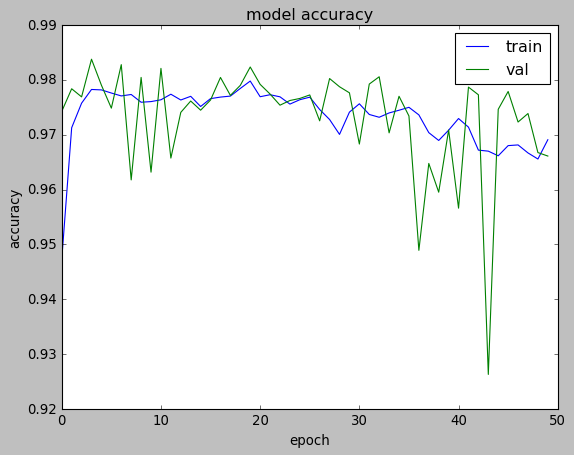

In [45]:
pyplot.plot(history_RNN.history['accuracy'])
pyplot.plot(history_RNN.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

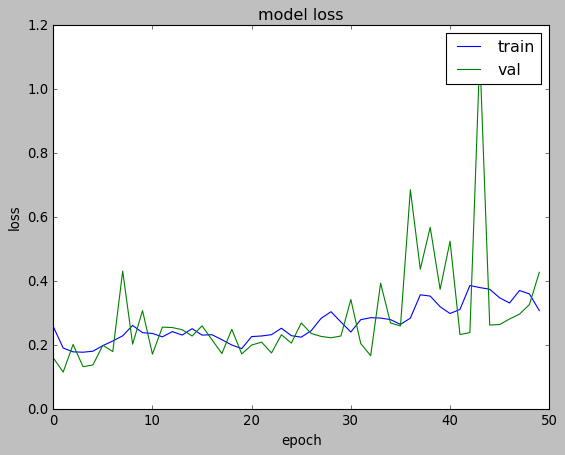

In [46]:
pyplot.plot(history_RNN.history['loss'])
pyplot.plot(history_RNN.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

Confusion Matrix
[[83128  2021]
 [ 3760 81680]]
Error Rate     :  3.3888468775829628
Specificity    :  97.58545298144587
Sensitivity    :  95.67259000092072
MODEL ACCURACY :  96.61115312241704


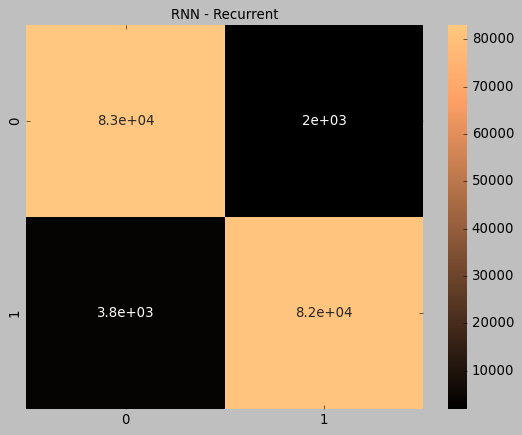

In [47]:
ypred_rnn=model_RNN.predict_classes(X_test_rnn)
confusion_metrix_calculation(ypred_rnn,y_test)
plt.title('RNN - Recurrent', fontsize=12)
plt.show()

# LSTM

In [48]:
X_train_lstm1 = X_train
X_test_lstm1 = X_test
y_train_lstm = y_train
y_test_lstm = y_test

ls = StandardScaler()
X_train_lstm = ls.fit_transform(X_train_lstm1)
X_test_lstm = ls.transform(X_test_lstm1)

X_train_lstm=X_train_lstm.reshape(X_train_lstm.shape[0],1,X_train_lstm.shape[1])
X_test_lstm=X_test_lstm.reshape(X_test_lstm.shape[0],1,X_test_lstm.shape[1])
#Building LSTM model for the dataset
model_LSTM= Sequential()
model_LSTM.add(LSTM(100,input_shape=X_train_lstm[0].shape,return_sequences=True, activation="relu"))
model_LSTM.add(LSTM(50,return_sequences=True,activation="relu"))
model_LSTM.add(Dense(16,activation="relu"))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss="binary_crossentropy", optimizer="rmsprop")
model_LSTM.summary()
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_LSTM = model_LSTM.fit(X_train_lstm,y_train_lstm, epochs=50, validation_data=(X_test_lstm, y_test_lstm),verbose=1)
#history_LSTM = model_LSTM.fit(X_train_lstm,y_train_lstm, epochs=100, validation_data=(X_test_lstm, y_test_lstm),verbose=1)
#history_LSTM = model_LSTM.fit(X_train_lstm,y_train_lstm, epochs=150, validation_data=(X_test_lstm, y_test_lstm),verbose=1)
#history_LSTM = model_LSTM.fit(X_train_lstm,y_train_lstm, epochs=200, validation_data=(X_test_lstm, y_test_lstm),verbose=1)
#model_LSTM.save('model_LSTM.hdf5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            52400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
dense_8 (Dense)              (None, 1, 16)             816       
_________________________________________________________________
dense_9 (Dense)              (None, 1, 1)              17        
Total params: 83,433
Trainable params: 83,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.1052 - accuracy: 0.9852 - val_loss: 0.0886 - val_accuracy: 0.9920
Epoch 2/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.0862 - accuracy: 0.9

In [49]:
# evaluate the model
_, train_acc4 = model_LSTM.evaluate(X_train_lstm, y_train_lstm,verbose=0)
_, test_acc4 = model_LSTM.evaluate(X_test_lstm, y_test_lstm,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc4, test_acc4))

Train: 0.998, Test: 0.998


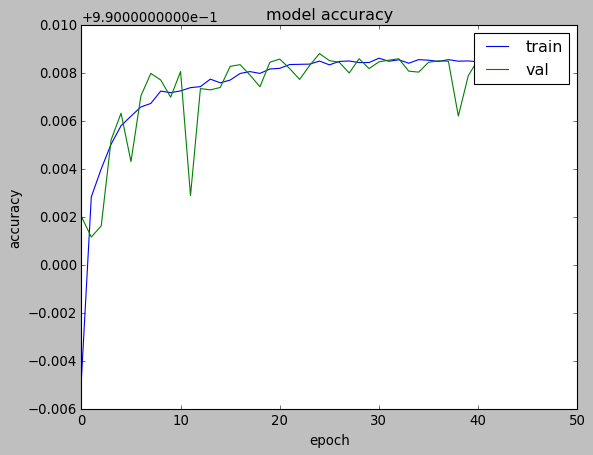

In [50]:
pyplot.plot(history_LSTM.history['accuracy'])
pyplot.plot(history_LSTM.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

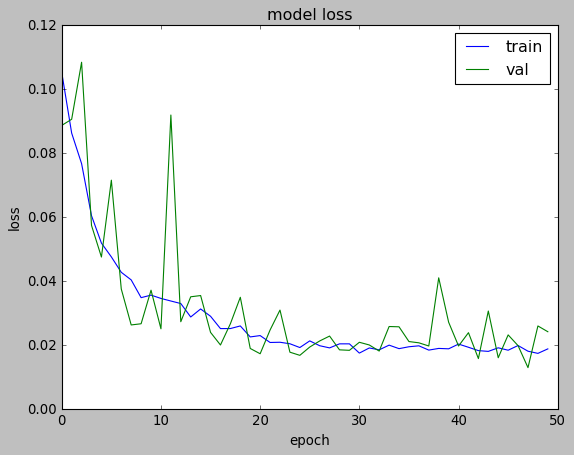

In [51]:
pyplot.plot(history_LSTM.history['loss'])
pyplot.plot(history_LSTM.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

Confusion Matrix
[[84938   211]
 [   87 85353]]
Error Rate     :  0.1746888720843665
Specificity    :  99.75340096302183
Sensitivity    :  99.8976771537783
MODEL ACCURACY :  99.82531112791563


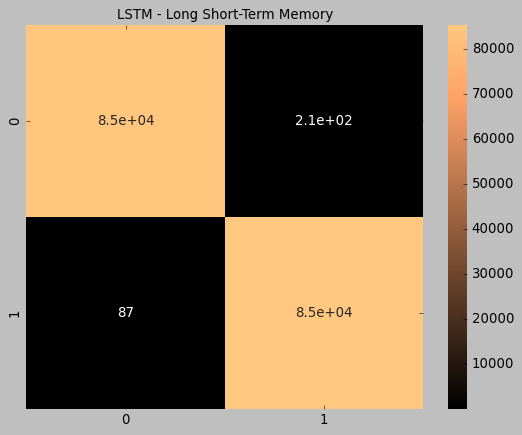

In [52]:
ypred_lstm=model_LSTM.predict_classes(X_test_lstm)
ypred_lstm=ypred_lstm.reshape(ypred_lstm.shape[0], ypred_lstm.shape[1])
confusion_metrix_calculation(ypred_lstm,y_test)
plt.title('LSTM - Long Short-Term Memory', fontsize=12)
plt.show()

# GRU

In [53]:
X_train_gru1 = X_train
X_test_gru1 = X_test
y_train_gru = y_train
y_test_gru = y_test

ls = StandardScaler()
X_train_gru = ls.fit_transform(X_train_gru1)
X_test_gru = ls.transform(X_test_gru1)

X_train_gru=X_train_gru.reshape(X_train_gru.shape[0],1,X_train_gru.shape[1])
X_test_gru=X_test_gru.reshape(X_test_gru.shape[0],1,X_test_gru.shape[1])
#Building GRU model for the dataset
model_GRU= Sequential()
model_GRU.add(GRU(100,input_shape=X_train_gru[0].shape,return_sequences=True, activation="relu"))
model_GRU.add(GRU(50,return_sequences=True, activation="relu"))
model_GRU.add(Dense(16,activation="relu"))
model_GRU.add(Dense(1))
model_GRU.compile(loss="binary_crossentropy", optimizer="rmsprop")
model_GRU.summary()
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_GRU = model_GRU.fit(X_train_gru,y_train_gru, epochs=50, validation_data=(X_test_gru, y_test_gru),verbose=1)
#history_GRU = model_GRU.fit(X_train_gru,y_train_gru, epochs=100, validation_data=(X_test_gru, y_test_gru),verbose=1)
#history_GRU = model_GRU.fit(X_train_gru,y_train_gru, epochs=150, validation_data=(X_test_gru, y_test_gru),verbose=1)
#history_GRU = model_GRU.fit(X_train_gru,y_train_gru, epochs=200, validation_data=(X_test_gru, y_test_gru),verbose=1)
#model_GRU.save('model_GRU.hdf5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            39600     
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 50)             22800     
_________________________________________________________________
dense_10 (Dense)             (None, 1, 16)             816       
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1)              17        
Total params: 63,233
Trainable params: 63,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.0969 - accuracy: 0.9862 - val_loss: 0.1668 - val_accuracy: 0.9836
Epoch 2/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.0715 - accuracy: 0.9

In [54]:
# evaluate the model
_, train_acc5 = model_GRU.evaluate(X_train_gru, y_train_gru,verbose=0)
_, test_acc5 = model_GRU.evaluate(X_test_gru, y_test_gru,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc5, test_acc5))

Train: 0.999, Test: 0.998


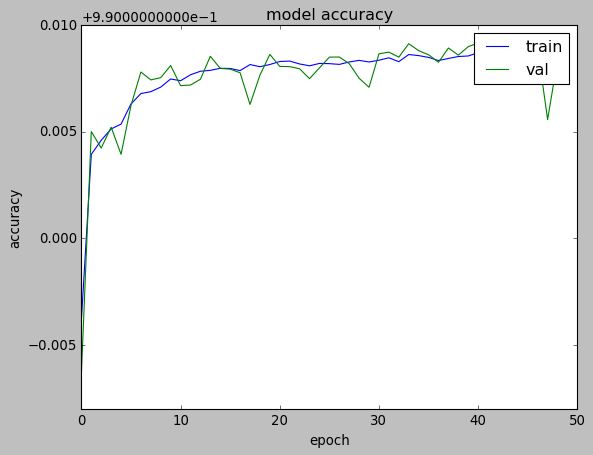

In [55]:
pyplot.plot(history_GRU.history['accuracy'])
pyplot.plot(history_GRU.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

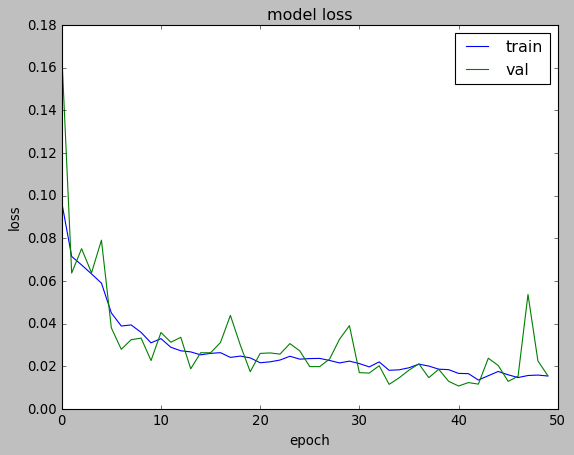

In [56]:
pyplot.plot(history_GRU.history['loss'])
pyplot.plot(history_GRU.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'])
pyplot.show()

Confusion Matrix
[[84938   211]
 [   87 85353]]
Error Rate     :  0.1746888720843665
Specificity    :  99.75340096302183
Sensitivity    :  99.8976771537783
MODEL ACCURACY :  99.82531112791563


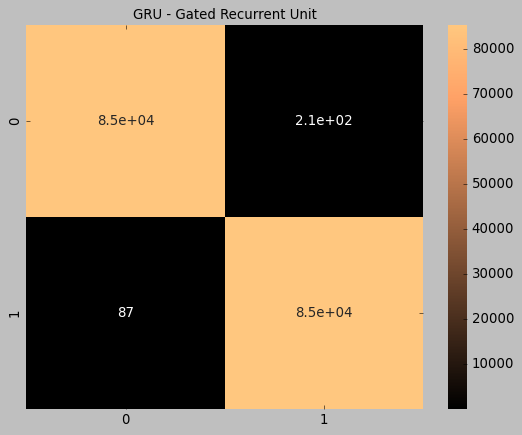

In [57]:
ypred_gru=model_GRU.predict_classes(X_test_gru)
ypred_gru=ypred_lstm.reshape(ypred_gru.shape[0], ypred_gru.shape[1])
confusion_metrix_calculation(ypred_gru,y_test)
plt.title('GRU - Gated Recurrent Unit', fontsize=12)
plt.show()

# Performance Evaluation 

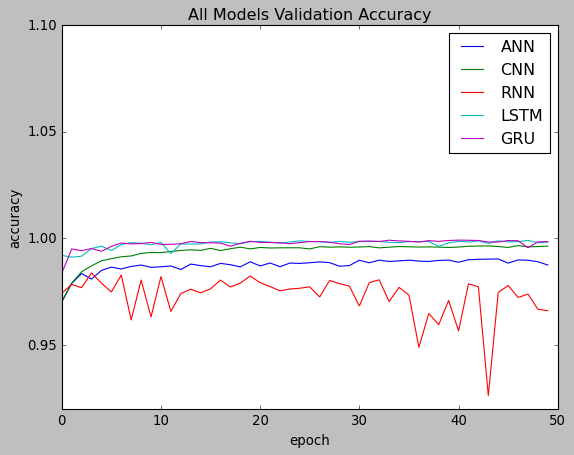

In [58]:
pyplot.plot(history_ANN.history['val_accuracy'])
pyplot.plot(history_CNN.history['val_accuracy'])
pyplot.plot(history_RNN.history['val_accuracy'])
pyplot.plot(history_LSTM.history['val_accuracy'])
pyplot.plot(history_GRU.history['val_accuracy'])
pyplot.title('All Models Validation Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['ANN', 'CNN','RNN','LSTM','GRU'])
pyplot.ylim(top=1.1)
pyplot.show()

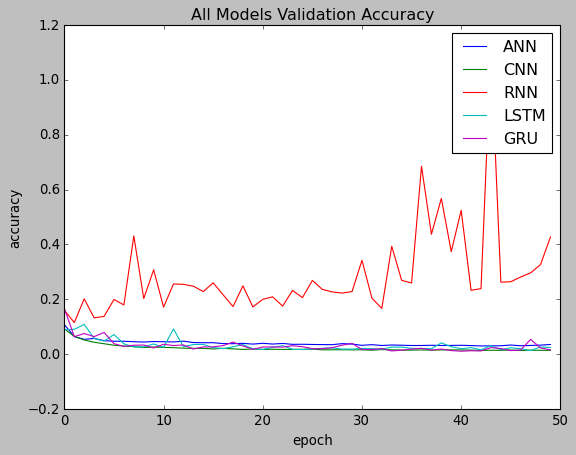

In [59]:
pyplot.plot(history_ANN.history['val_loss'])
pyplot.plot(history_CNN.history['val_loss'])
pyplot.plot(history_RNN.history['val_loss'])
pyplot.plot(history_LSTM.history['val_loss'])
pyplot.plot(history_GRU.history['val_loss'])
pyplot.title('All Models Validation Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['ANN', 'CNN','RNN','LSTM','GRU'])
pyplot.ylim(bottom = -0.2)
pyplot.show()

# Ensemble Voting Classifier(Hard):

In [ ]:
"""
This is proposed classifier which will take multiple(3) prediction and make neu prediction on majority vote.
-'voting_hard_classifier' is a function that make new prediction. Classic voting package has been avoided as the input shape of 
  'X_test' and prediction shape 'y_test' varried by networks.
-'ypred_ann_cnn_rnn' is a numpy array which contains 3  values of prediction in a row. For example ([1,1,0],[0,0,1]...)
-function will count by rows. give one value for each row. For example [1,0...]
"""

In [60]:
ypred_ann_cnn_rnn_lstm_gru = np.column_stack((ypred_ann, ypred_cnn,ypred_rnn,ypred_lstm,ypred_gru))

In [61]:
def voting_hard_classifier(ypred,ytest):
    y_predict=ypred.tolist()
    y_target=ytest.tolist()
    vote_predict=[]
    for i in range(len(y_predict)):
        count_0=0
        count_1=0
        for j in range(len(y_predict[i])):
            if y_predict[i][j]==0:
                count_0=count_0+1
            elif y_predict[i][j]==1:
                count_1=count_1+1
        if count_0>count_1:
            x=0
            vote_predict.append(x)
        elif count_0<count_1:
            x=1
            vote_predict.append(x)
    return vote_predict,y_target

In [62]:
predict_by_vote,target=voting_hard_classifier(ypred_ann_cnn_rnn_lstm_gru,y_test)

In [63]:
c_for_all_accuracy=confusion_matrix(target, predict_by_vote)# confusion matrix
AccV = ((c_for_all_accuracy[0][0] + c_for_all_accuracy[1][1]) / c_for_all_accuracy.sum())

Confusion Matrix
[[84944   205]
 [    0 85440]]
Error Rate     :  0.12017187509159441
Specificity    :  99.76063985054586
Sensitivity    :  100.0
MODEL ACCURACY :  99.87982812490841


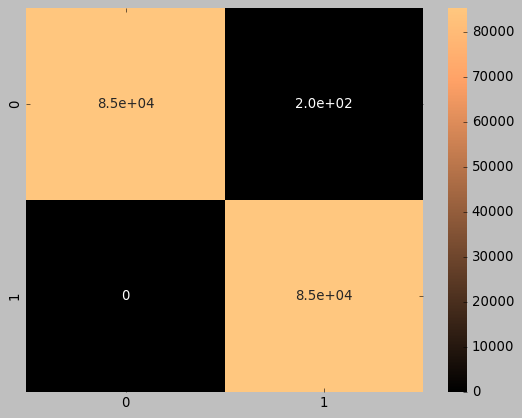

In [64]:
confusion_metrix_calculation(predict_by_vote,target)

In [65]:
#Accuracy_all_MODEL=[]
Accuracy_all_MODEL.append(test_acc)
Accuracy_all_MODEL.append(test_acc2)
Accuracy_all_MODEL.append(test_acc3)
Accuracy_all_MODEL.append(test_acc4)
Accuracy_all_MODEL.append(test_acc5)
Accuracy_all_MODEL.append(AccV)

In [66]:
Accuracy_all_MODEL

[0.9468723071241405,
 0.9802156059300424,
 0.9606832796956427,
 0.9999120693596891,
 0.9989331082308941,
 0.9874845147132874,
 0.9963186383247375,
 0.9963186383247375,
 0.9982531070709229,
 0.9984875917434692,
 0.9987982812490841]

### Accuracy of All Machine Learning and Deep Learning Models

In [3]:
ACCURACY_ALL_MODELS = []
for number in Accuracy_all_MODEL:
    ACCURACY_ALL_MODELS.append(round((number * 100),3))
#MODEL = ('Artificial Neural Network(ANN)','Convolutional Neural Network(CNN)','Reccurent Neural Network(RNN)','Long Short Time Memory(LSTM)','Gated Recurrent Unit(GRU)','Proposed Ensemble Neural Network')
MODEL = ('Logistic Regression',
 'Support Vector Classifier',
 'Dession Tree Classifier',
 'Random Forest Classifier',
 'Kneibour Classifier(KNN)',
 'Artificial Neural Network(ANN)',
 'Convolutional Neural Network(CNN)',
 'Reccurent Neural Network(RNN)',
 'Long Short Time Memory(LSTM)',
 'Gated Recurrent Unit(GRU)',
 'Proposed Ensemble Neural Network')
data_accuracy = list(zip(MODEL,ACCURACY_ALL_MODELS))
df1=pd.DataFrame(data_accuracy, columns=['Models','Accuracy'])

fig = go.Figure()
fig.add_trace(go.Bar(x=df1["Accuracy"], y=df1["Models"], orientation="h",text=df1["Accuracy"]))
fig.update_layout(xaxis_title="Accuracy", yaxis_title="Models")
fig.show()